In [238]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [257]:
path_file = "E:\Project\OOC\LEDs_Data_Processing\Encode_Decode\draw\data\data-Copy.xlsx"
# path_file = "E:\Project\OOC\LEDs_Data_Processing\Encode_Decode\draw\data\data.xlsx"
df = pd.read_excel(path_file)
print(df)

    Distance (m)  Code 1  Code 2  Code 3  Code 4  Bit error rate (%)
0            1.5      90      91      96      91                0.00
1            1.6      81      84      84      81                0.00
2            1.7      71      70      73      71                0.00
3            1.8      62      56      65      54                0.00
4            1.9      61      50      61      55                0.00
5            2.0      44      39      42      39                0.00
6            2.1      38      35      34      35                0.00
7            2.2      30      28      21      22                0.00
8            2.3       0       0       0       0                0.00
9            2.4       0       0       0       0                0.00
10           1.5      99      98      99      97                0.00
11           1.6      98      98      99      97                0.00
12           1.7      99      97      98      93                0.26
13           1.8      96      93  

In [258]:
distance = df.iloc[:10, 0]

c1_14khz_accuracy= df.iloc[:10, 1].to_list()
c1_18khz_accuracy= df.iloc[10:20, 1].to_list()
c1_20khz_accuracy= df.iloc[20:30, 1].to_list()

# print(distance)
c2_14khz_accuracy= df.iloc[:10, 2].to_list()
c2_18khz_accuracy= df.iloc[10:20, 2].to_list()
c2_20khz_accuracy= df.iloc[20:30, 2].to_list()


c3_14khz_accuracy= df.iloc[:10, 3].to_list()
c3_18khz_accuracy= df.iloc[10:20, 3].to_list()
c3_20khz_accuracy= df.iloc[20:30, 3].to_list()


_14khz_ber = df.iloc[:10, 5].to_list()
_18khz_ber = df.iloc[10:20, 5].to_list()
_20khz_ber = df.iloc[20:30, 5].to_list()
print(c3_20khz_accuracy)



[96, 96, 93, 93, 92, 92, 90, 87, 86, 76]


Draw single led

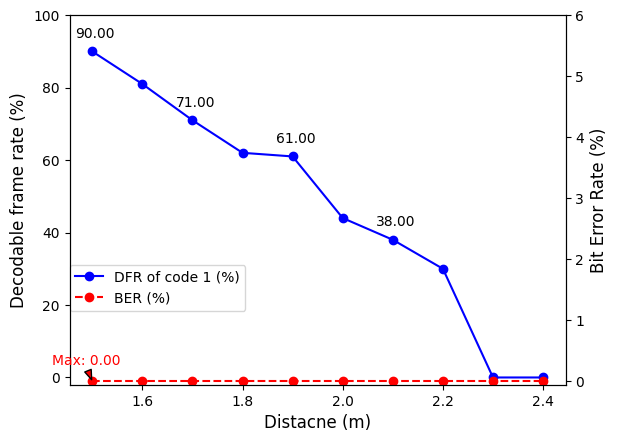

In [256]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Distacne (m)', fontsize=12)
ax1.set_ylabel('Decodable frame rate (%)', color='black', fontsize=12)
# ax1.set_xlim(1.6, 2)
ax1.set_ylim(-2, 100)
line1 =ax1.plot(distance, c1_14khz_accuracy, color='Blue', label='DFR of code 1 (%)', marker = 'o')

ax1.tick_params(axis='y', labelcolor='black')
# ax1.scatter(distance, c1_code1_accuracy, color='blue', edgecolors='blue', s=3)
for i, txt in enumerate(c1_14khz_accuracy):
    if i in [0, 2, 4, 6]:
        ax1.annotate(f'{txt:.2f}', (distance[i], c1_14khz_accuracy[i]), textcoords="offset points", xytext=(2,10), ha='center', color='black', fontsize=10)


ax2 = ax1.twinx()
ax2.set_ylim(-0.06, 6)
ax2.set_ylabel('Bit Error Rate (%)', color='black', fontsize=12)
line3 = ax2.plot(distance, _14khz_ber, color='red', label='BER (%)', linestyle='--', marker = 'o')
ax2.tick_params(axis='y', labelcolor='black')

peak_index = np.argmax(_14khz_ber)  # Chỉ số của điểm cực đại
peak_value = _14khz_ber[peak_index]  # Giá trị của điểm cực đại
peak_distance = distance[peak_index]  # Khoảng cách của điểm cực đại
ax2.annotate(f'Max: {peak_value:.2f}', 
             (peak_distance, peak_value), 
             textcoords="offset points", 
             xytext=(-4,12), 
             ha='center', 
             color='red', 
             fontsize=10, 
             fontweight='normal',
             arrowprops=dict(facecolor='red', edgecolor='black', shrink=0.1, width = 2, headwidth = 5, headlength = 7))



lines = ax1.get_lines() + ax2.get_lines()
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc=(0, 0.2))  # Hiển thị hộp chú thích kết hợp trên ax1

plt.savefig('_1led_14khz.png')


Draw two leds

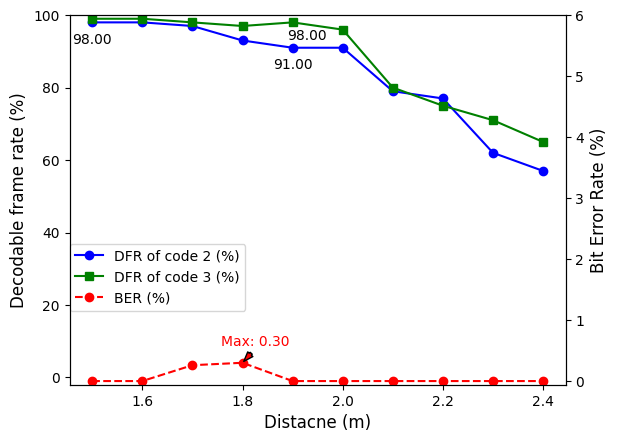

In [276]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Distacne (m)', fontsize=12)
ax1.set_ylabel('Decodable frame rate (%)', color='black', fontsize=12)
# ax1.set_xlim(1.6, 2)
ax1.set_ylim(-2, 100)
line1 =ax1.plot(distance, c2_18khz_accuracy, color='Blue', label='DFR of code 2 (%)', marker = 'o')
line2 =ax1.plot(distance, c3_18khz_accuracy, color='Green', label='DFR of code 3 (%)', marker = 's')
ax1.tick_params(axis='y', labelcolor='black')
# ax1.scatter(distance, c1_code1_accuracy, color='blue', edgecolors='blue', s=3)
for i, txt in enumerate(c2_18khz_accuracy):
    if i in [0, 4]:
        ax1.annotate(f'{txt:.2f}', (distance[i], c2_18khz_accuracy[i]), textcoords="offset points", xytext=(0,-15), ha='center', color='black', fontsize=10)
for i, txt in enumerate(c3_18khz_accuracy):
    if i in [4]:
        ax1.annotate(f'{txt:.2f}', (distance[i], c2_18khz_accuracy[i]), textcoords="offset points", xytext=(10,6), ha='center', color='black', fontsize=10)

ax2 = ax1.twinx()
ax2.set_ylim(-0.06, 6)
ax2.set_ylabel('Bit Error Rate (%)', color='black', fontsize=12)
line3 = ax2.plot(distance, _18khz_ber, color='red', label='BER (%)', linestyle='--', marker = 'o')
ax2.tick_params(axis='y', labelcolor='black')

peak_index = np.argmax(_18khz_ber)  # Chỉ số của điểm cực đại
peak_value = _18khz_ber[peak_index]  # Giá trị của điểm cực đại
peak_distance = distance[peak_index]  # Khoảng cách của điểm cực đại
ax2.annotate(f'Max: {peak_value:.2f}', 
             (peak_distance, peak_value), 
             textcoords="offset points", 
             xytext=(9,12), 
             ha='center', 
             color='red', 
             fontsize=10, 
             fontweight='normal',
             arrowprops=dict(facecolor='red', edgecolor='black', shrink=0.1, width = 2, headwidth = 5, headlength = 7))



lines = ax1.get_lines() + ax2.get_lines()
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc=(0, 0.2))  # Hiển thị hộp chú thích kết hợp trên ax1

plt.savefig('_2led_18khz.png')
